<h1><b>Restricted Boltzmann Machine</b></h1>
<p align="justify">Στην συγκεκριμένη άσκηση θα μελετήσετε τον τρόπο λειτουργίας μιας <i>RBM (<a href="https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine">Restricted Boltzmann Machine</a>)</i>, χρησιμοποιώντας το έτοιμο πρόγραμμα που σας δίνεται.Το συγκεκριμένο πρόγραμμα αξιοποιεί το <a href="https://en.wikipedia.org/wiki/MNIST_database">dataset του <i>MNIST</i></a>, όπου είναι μια μεγάλη βάση δεδομένων με χειρόγραφα ψηφία που χρησιμοποιείται συνήθως για την εκπαίδευση διαφόρων συστημάτων επεξεργασίας εικόνας.</p>
<p align="justify">Μία αρκετά σημαντική εφαρμογή της <i>RBM</i> είναι η εξαγωγή χαρακτηριστικών (feature representation) από ένα dataset με σκοπό την αναπαράσταση της εισόδου (ορατοί νευρώνες) με ένα διάνυσμα μικρότερης διάστασης (κρυφοί νευρώνες). Στη συγκεκριμένη άσκηση θα συγκρίνετε την ακρίβεια ενός ταξινομητή ψηφίων με τη χρήση του αλγορίθμου <i>Logistic Regression</i>, όταν εκείνος δέχεται ως είσοδο το dataset (i) αφου υποστεί επεξεργασία από το <i>RBM</i> και (ii) χωρίς να έχει υποστεί επεξεργασία από το <i>RBM</i>.</p>
<p align="justify">Το δοθέν <i>dataset</i>, στα πλαίσια της άσκησης έχει
διογκωθεί με τεχνητό τρόπο (γραμμική μετατόπιση ενός εικονοστοιχείου (pixel) σε
κάθε κατεύθυνση) ώστε να έχουμε ένα <i>dataset</i> 5 φορές μεγαλύτερο. Με βάση τον κώδικα που σας έχει δοθεί, καλείστε να απαντήσετε στα παρακάτω ερωτήματα:</p>
<ul>
<li>Να περιγράψετε σύντομα τον τρόπο λειτουργίας μιας <i>RBM</i>. Τι διαφορές έχει σε σχέση με μία <i> Μηχανή Boltzmann</i>;</li>
<li>Να αναφέρετε τις βασικότερες εφαρμογές μιας RBM.</li>
<li>Συγκρίνετε τα αποτελέσματα της ταξινόμησης με τον αλγόριθμo <i>Logistic Regression</i> χωρίς τη χρήση RBM σε σχέση με τα αποτελέσματα της ταξινόμησης που έχει χρησιμοποιηθεί η <i>RBM</i> για την εξαγωγή των χαρακτηριστικών. Τι παρατηρείτε ως προς την ακρίβεια των αποτελεσμάτων;</li>
<li>Επιχειρήστε να αλλάξετε τον αριθμό των κρυφών νευρώνων (components) από 100 σε 200. Τι
παρατηρείτε ως προς τα αποτελέσματα και τον χρόνο που έτρεξε το
πρόγραμμα μέχρι να γίνει <i>fit</i>΄;</li>
<li>Προσπαθήστε να τρέξετε το πρόγραμμα τρέξτε το πρόγραμμα εκ νέου με το <i>κανονικό dataset</i>. Τι παρατηρείτε ως προς την ακρίβεια των αποτελεσμάτων; Πού μπορεί να οφείλονται τυχόν αποκλίσεις σε σχέση με πριν;</li>
</ul>

Automatically created module for IPython interactive environment
[BernoulliRBM] Iteration 1, pseudo-likelihood = -27.63, time = 0.04s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -27.03, time = 0.09s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.98, time = 0.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25.09, time = 0.09s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -23.97, time = 0.09s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -23.77, time = 0.10s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -23.52, time = 0.10s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -22.80, time = 0.10s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -22.38, time = 0.09s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -22.40, time = 0.09s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -22.75, time = 0.09s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -22.31, time = 0.09s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -21.91, time = 0.08s
[BernoulliRBM] Iteration 14, pseud

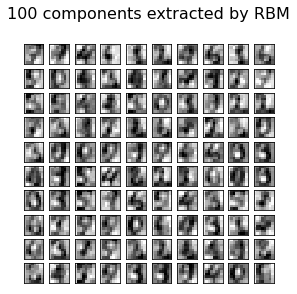

In [18]:
from __future__ import print_function

print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# #############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    #def shift(x, w):
        #return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    #X = np.concatenate([X] +
                       #[np.apply_along_axis(shift, 1, X, vector)
                        #for vector in direction_vectors])
    #Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y


# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000,
                                           multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

## Απαντήσεις 




1.   Σκοπός μιας RBM είναι να βρεθούν οι παράμετροι, δηλαδή όλα τα βάρη που να ελαχιστοποιούν την ενέργεια του συστήματος ή αλλιώς να βρεθεί το joint propability distribution που περιγράφει καλύτερα τα δεδομένα εισόδου και να μεγιστοποιεί την loglikelihood function . Για τον σκοπό αυτό πραγματοποιούνται τα εξής βήματα στην εκπαίδευση του. 


*   Έχουμε αρχικοποίηση όλων των βαρών, δηλαδή των συνδέσεων των κρυφών και ορατών νευρώνων καθώς και τα biases (Παρακάτω περιγράφουμε τι συμβαίνει σε μια εποχή)
*   Για κάθε δείγμα στο Training Set εκτελούμε Gibbs Sampling k φορές έτσι ώστε να πάρουμε 2 νέα δείγματα, ένα που να περιγράφεται απο τους ορατούς νευρώνες και ένα που να περιγράφεται από τους κρυφούς νευρώνες. Για κάθε βήμα στο Gibbs Sampling η ενεργοποίηση ενός νευρώνα βασίζεται στη πιθανότητα που θα πάρει από την σιγμοειδή συνάρτηση ενεργοποίησης. Πολλές φορές στην πράξη χρησιμοποιούμε k=1.
* Έπειτα απο τα k βήματα έχουμε ενα σετ [visible,hidden]_0 που είναι τα αρχικά μας διανύσματα και ένα σετ [visible,hidden]_1 που είναι τα reconstructed.
* Με βάση αυτά τα διανύσματα και πιο συγκεκριμένα διάφορες παραλλαγές των διαφορών τους βρίσκουμε τα ΔW , Δb, Δc, δηλαδή τον παράγοντα που θα χρησιμοποιηθεί στο gradient ascent για την ανανέωση των βαρών.

* Εκμεταλλευόμαστε και το learning rate και πραγματοποιούμε ανανέωση των βαρών.

Οι διαφορές μια RBM από μια Boltzmann Μachine χωρίζονται σε 2. Η πρώτη έχει να κάνει με την αρχιτεκτονική του γράφου τους καθώς η RBM δεν έχει βάρη που να συνδέει τους νευρώνες του ίδιου στρώματος μεταξύ τους. Η δεύτερη έχει να κάνει με τον τρόπο εκπαίδευσης του συστήματος καθώς η Boltzmann Machine χρησιμοποιεί simulated annealing στο learning rate και εισάγει την έννοια της μείωσης της θερμοκρασίας στον αλγόριθμο της.

2.   Μια RBM μπορεί να χρησιμοποιηθεί τόσο για dimension reduction όσο και για classifiaction, regression. Η πληροφορία που προσπαθεί να εξάγει μια RBM είναι οι στατιστικές ιδιότητες του δείγματος που έχει σαν είσοδο. Συνεπώς μπορεί να παράξει επίσης νέα δείγματα που δεν έχουν παρατηρηθεί στην είσοδο.

3. Τρεχοντας τον παραπάνω κώδικα βλέπουμε ότι όταν η είσοδος του logistic regression είναι οι μειωμένες διαστάσεις του RBM έχουμε καλύτερα αποτελέσματα σε όλες τις μετρικές δηλαδή στο precision,recall,f1-score και accuracy.

4. Αυξάνοντας τα hidden neurons από 100 σε 200 είχαμε σχεδόν διπλασιασμό του χρόνου εκπαίδευσης. Από 1m07sec σε 1m50sec και είχαμε μια μικρή βελτίωση στις μετρικές μας καθώς όλες τους από 0.94 τιμή που είχαν πήγαν στο 0.95.

5. Όταν τρέχουμε το πρόγραμμα με το κανονικό dataset παρατηρούμε ότι έχουμε αύξηση της ακρίβειας στο logistic regression χωρις την χρήση του RBF. Αυτό οφείλεται στο γεγονός ότι δεν υπάρχει πλεον ο θόρυβος που υπήρχε πριν και πλεον έχουμε μόνο χρήσιμη πληροφορία στο training dataset μας. Από αυτή την εφαρμογή επιβεβαιώνουμε την ιδιότητα των Boltzmann Machines και των RBMs να μπορούν να βρούν τις στατιστικές ιδιότητες και να αναπαράξουν δεδομένα ακόμα και όταν τα δεδομένα εισόδου είναι ελλιπή ή έχουν αρκετό θόρυβο.


